## **Loading libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Generate random signal

In [2]:
def generate_message(data_size):
  m = np.array(np.random.randint(0, 2, size=data_size))
  return m
# 產生一維的的數組 m=[1,0,0,1,...,]  0~2(不包含) 長度為data_size

## Modulation (BPSK)

In [4]:
def modulation(c,SNR):
  x=2*c-1
  signal_power = 10**(SNR/10)
  x = 2*c - 1 # BPSK modulation
  x = np.sqrt(signal_power) * x# Scale signal power
  return x

## AWGN Channel

In [5]:
def AWGN_Channel(x, SNR):
    # Calculate the noise power
    Es = np.mean(np.abs(x)**2)  # Signal power
    N0 = Es / (10**(SNR/10))    # Noise power

    # Generate Gaussian noise with the calculated noise power
    noise = np.sqrt(N0/2) * np.random.randn(*x.shape)   #可以將x中的元素作為單獨的參數傳遞給函數  例如x是2*3的矩陣  則傳入的東西為(2,3) 而不是傳([2,3])進去

    # Add the noise to the signal
    y = x + noise

    return y

# Hard decision

After we receive the signal, we first do the hard decision. If the signal is greater than the threshold, we say it is 1 and if the signal is smaller than the threshold it is 0.

In [10]:
def hard_decision(y):
  # Set the hard decision threshold
  threshold = 0
  m_hat = np.zeros(len(y))
  m_hat[y >= threshold] = 1
  m_hat[y < threshold] = 0
  return m_hat

## Performance evaluation

We go through all signals to calculate the bit error rate.

P.S. output the number of elements of error bits

In [11]:
def calculate_error(m_hat,m):
  # Find out all the error elements to get BER
  bit_err = np.sum(m_hat != m)
  return bit_err

0 / 8
1 / 8
2 / 8
3 / 8
4 / 8
5 / 8
6 / 8
7 / 8
8 / 8


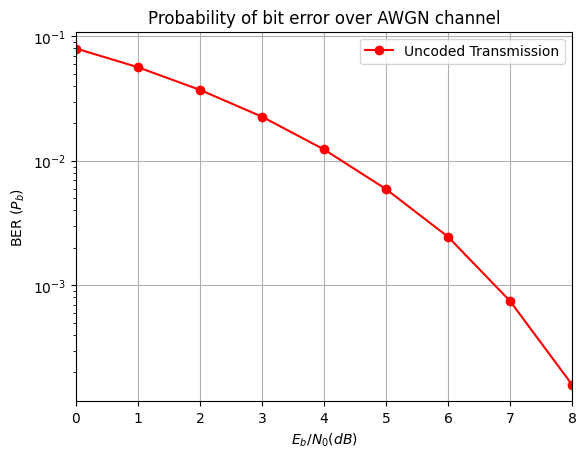

Bit Error Rate: [0.07992 0.05654 0.03719 0.02265 0.01236 0.00594 0.00246 0.00075 0.00016]


In [12]:
SNR_start = 0
SNR_end = 8
step_size = 1
SNR = np.arange(SNR_start,SNR_end+1,step_size)
length_SNR = len(SNR)
BER = np.zeros(length_SNR)
data_size = 100000


for i in range(len(SNR)):
  m = generate_message(data_size)
  c = m
  x = modulation(c,SNR[i])
  y = AWGN_Channel(x,SNR[i])
  m_hat = hard_decision(y)
  bit_err = calculate_error(m_hat,m)

  
  BER[i] = bit_err/data_size
  print(i,"/",len(SNR)-1)
  # Fig Plot
EbN0dBs = np.arange(start=SNR_start,stop=SNR_end+1,step=step_size)
fig1 = plt.figure()
plt.semilogy(EbN0dBs,BER,color='r',marker='o',linestyle='-',label='Uncoded Transmission')
plt.xlabel('$E_b/N_0(dB)$');plt.ylabel('BER ($P_b$)')
plt.title('Probability of bit error over AWGN channel')
plt.xlim(SNR_start,SNR_end);plt.grid(True);
plt.legend()
plt.show()
print("Bit Error Rate:", BER)